# Анализ гипотез для увеличения выручки интернет-магазина

Описание проекта: Формируется план по увеличению выручки крупного интернет-магазина.

Цель исследования: выработка рекомендаций по увеличению выручки интернет-магазина.

Задачи исследования:
- приоритезация гипотез;
- проведение А/В-теста.

## План проекта

1.	Загрузка и анализ данных
2.	Предобработка данных
3.	Приоритезация гипотез
4.  Анализ A/B-теста
5.	Выводы

## 1. Загрузка и анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Выводы

Данные загружены. Выведена информация о данных. Выведены первые значения переменных. В данных нет пропусков, об этом свидетельствует количество значений в переменных. Несколько переменных нуждаются в изменении типа:  поля date таблиц orders и visitors - из object в datetime, т.к. это поля дат; transactionId и visitorId из int в object, т.к. это качественные характеристики. Также нужно скорректировать названия столбцов в таблицах hypothesis и visitors, чтобы они состояли из прописных букв.

## 2.	Предобработка данных

In [5]:
hypothesis = hypothesis.rename({'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact', 'Confidence': 'confidence','Efforts': 'efforts'}, axis = 1)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
orders = orders.rename({'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, axis = 1)
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders['transaction_id'] = orders['transaction_id'].astype(object)
orders['visitor_id'] = orders['visitor_id'].astype(object)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null object
visitor_id        1197 non-null object
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Корректируем названия столбцов в таблицах: убираем строчные буквы. Меняем тип данных переменных date таблиц orders и visitors - из object в datetime; transaction_id и visitor_id из int в object. Проверяем.

In [8]:
print(orders.duplicated().sum())# проверка на дубли

0


In [9]:
print(visitors.duplicated().sum())# проверка на дубли

0


Проверяем таблицы на дубли. Дублей нет.

## 3.	Приоритезация гипотез

In [10]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['rank_ice'] = (hypothesis[['ice']].sort_values(by='ice',ascending=False)).rank(method='min').astype(int) 
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Применяем фреймворк ICE для приоритизации гипотез. Сортируем их по убыванию приоритета. Проверяем.

In [11]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['rank_rice'] = (hypothesis[['rice']].sort_values(by='rice',ascending=False)).rank(method='min').astype(int) 
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False) 

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Применяем фреймворк RICE для приоритизации гипотез. Сортируем их по убыванию приоритета. Проверяем.

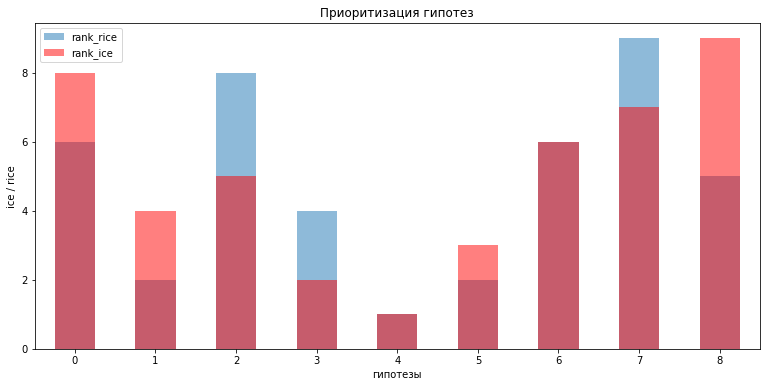

In [12]:
hypothesis['rank_rice'].plot.bar(figsize = (13, 6), title = 'Приоритизация гипотез', alpha = 0.5, x='hypothesis');
hypothesis['rank_ice'].plot.bar(figsize = (13, 6), title = 'Приоритизация гипотез', color = 'r', alpha = 0.5, x ='hypothesis');
plt.legend()
plt.xticks(rotation=0)
plt.xlabel("гипотезы")
plt.ylabel("ice / rice");

Построим график приоритизации гипотез по ICE и RICE. Как видно, приоритетность гипотез указанные фреймворки показывают по разному. Рассчитаем ранги приоритизации гипотез для ICE и RICE для устранения влияния размерности коэффициентов. Построим график.
Гипотеза 8, занимавшая по показателю ICE 1 место, при расчете RICE стала 5-й.
Гипотеза 0, занимавшая по показателю ICE 2 место, при расчете RICE разделила 3-4 место.
Гипотеза 7, занимавшая по показателю ICE 3 место, при расчете RICE стала 1-й.
Гипотеза 6, занимавшая по показателю ICE 4 место, при расчете RICE разделила 3-4 место.
Гипотеза 2, занимавшая по показателю ICE 5 место, при расчете RICE стала 2-й.
Гипотеза 1, занимавшая по показателю ICE 6 место, при расчете RICE стала 7-й.
Гипотеза 3, занимавшая по показателю ICE 7 место, при расчете RICE стала 6-й.
Гипотеза 4 для обоих расчетов заняла последнее место.
Разница в рангах гипотез по ICE и RICE обусловлена показателем Reach (скольких пользователей затронет вносимое изменение). Для гипотез 7, 2 и 3 указанный показатель имеет высокое значение (8 и выше), что повлияло на повышение ранга указанных гипотез при расчете RICE. У гипотез 0, 1, 4, 5 и 8 показатель Reach - низкий, что привело к снижению ранга гипотезы при расчете RICE, по сравнению с расчетом iCE.

## 4. Анализ A/B-теста

### График кумулятивной выручки по группам

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, \
'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), \
axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


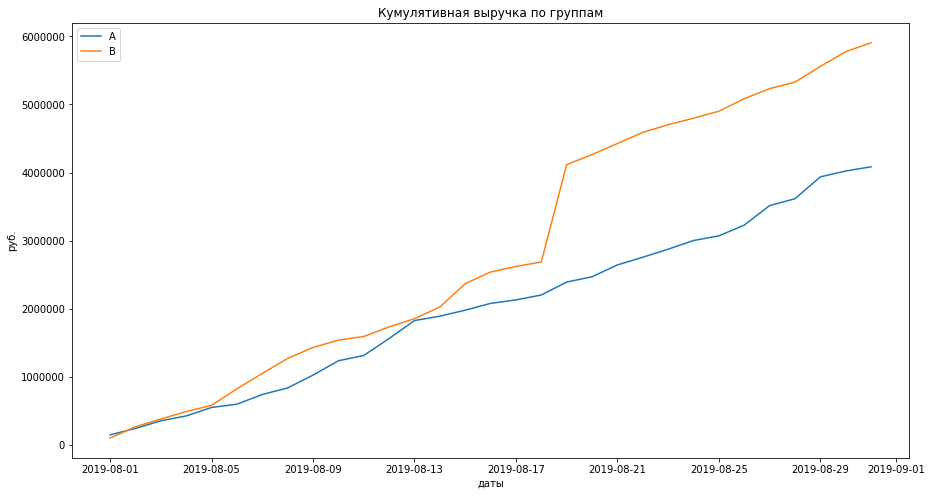

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')# Строим график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');# Строим график выручки группы B
plt.gcf().set_size_inches(15, 8)
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.xlabel("даты")
plt.ylabel("руб.");

Рассчитаем таблицу накопленных значений визитов, заказов, покупателей и выручки. На ее основе построим график накопленной выручки по группам.
На графике видно, что выручка группы B выше выручки группы A на большей части графика.
Линии накопленной выручки обеих групп приблизительно равномерно растут до 17.08.2019, далее у линии группы B следует резкий рывок вверх, что позволяет предположить что в группе B имели место очень дорогие покупки, что существенно повлияло на "успешность" группы B, исказило данные и может привести к неправильным выводам.
Следует проверить обе группы на аномальные значения и исключить их, если они будут обнаружены.

### График кумулятивного среднего чека по группам

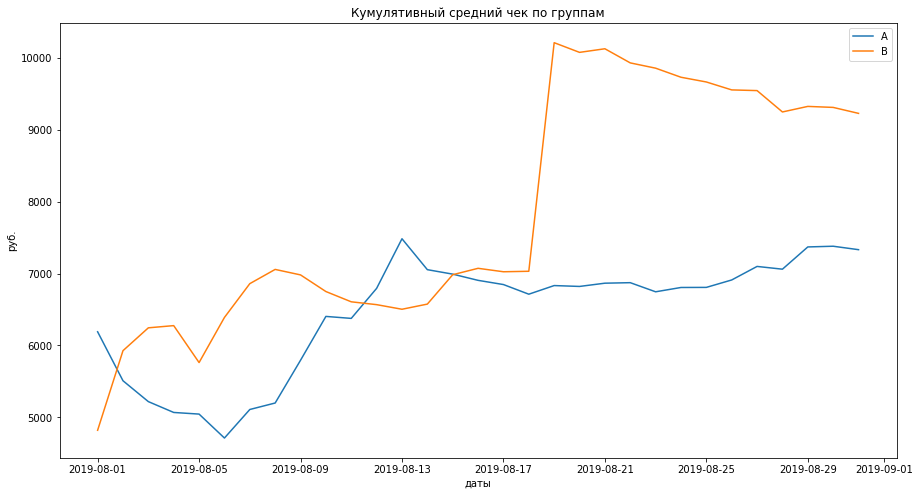

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.gcf().set_size_inches(15, 8)
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.xlabel("даты")
plt.ylabel("руб.");

Построим график накопленного среднего чека по группам.
На графике видно, что средние чеки групп колеблются до даты 17.08.2019, далее средний чек группы B резко возрастает, затем начинает медленно снижаться.
График подтверждает ранее сделанные выводы о наличии в группе B сверхдорогих покупок, которые существенно влияют на показатели группы. Указанные сверхдорогие покупки (аномальные значения) нужно исключить из исследования.

### График относительного изменения кумулятивного среднего чека группы B к группе A

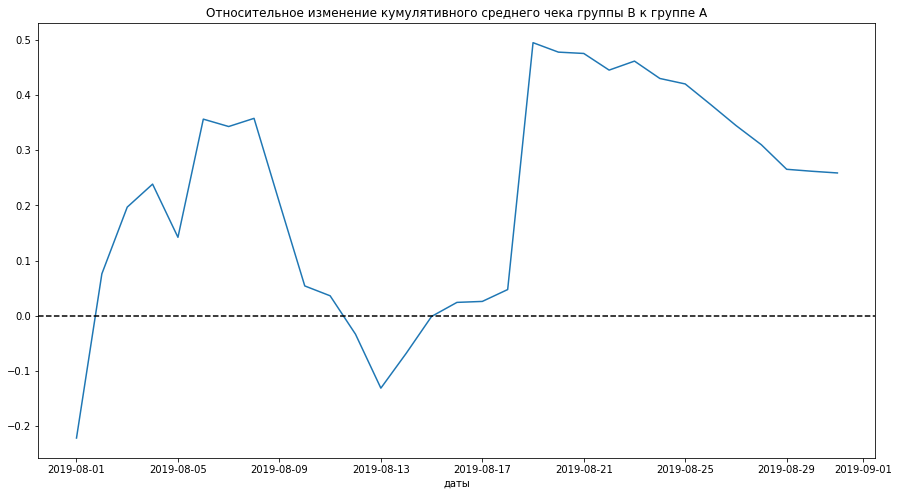

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', \
right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)# cтроим отношение средних чеков
plt.axhline(y=0, color='black', linestyle='--'); # добавляем ось X
plt.gcf().set_size_inches(15, 8)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel("даты");

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
В целом график подтверждает ранее сделанный вывод о наличии выбросов, однако он также показал, что аномальные значения (сверхдорогие покупки) имели место не только после 17.08.2019, но и до указанной даты.

### График кумулятивной конверсии по группам

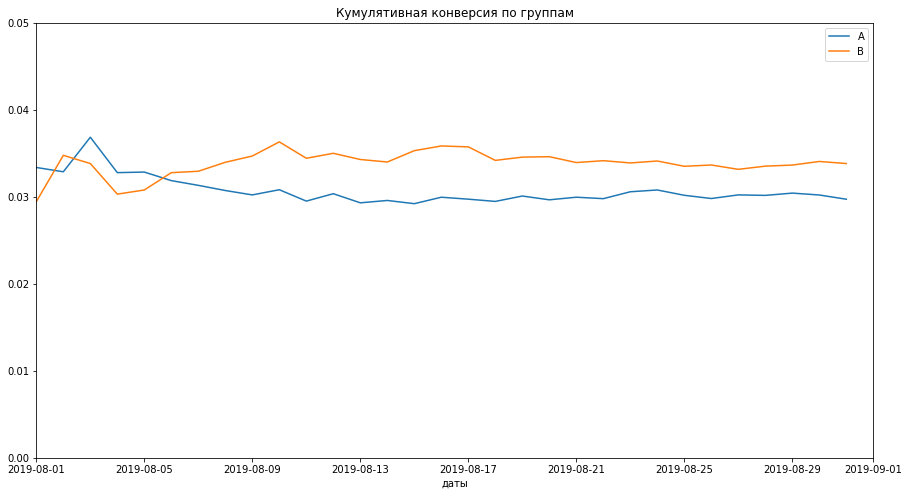

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']# отделяем данные по группе A
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']# отделяем данные по группе B
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')# строим графики
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])# задаем масштаб осей
plt.gcf().set_size_inches(15, 8)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel("даты");

Группы колебались около одного значения, но затем конверсия группы B выросла и зафиксировалась, а конверсия группы B снизилась и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

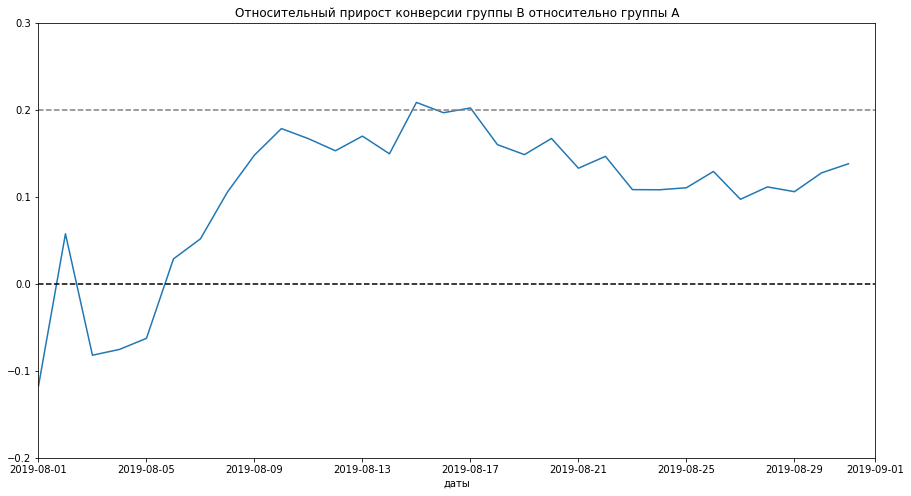

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])
plt.gcf().set_size_inches(15, 8)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel("даты");

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия стабильно выше аналогичного показателя по группе A.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
Нужно проанализировать аномалии, возможно, они изменят картину.

### График количества заказов по пользователям

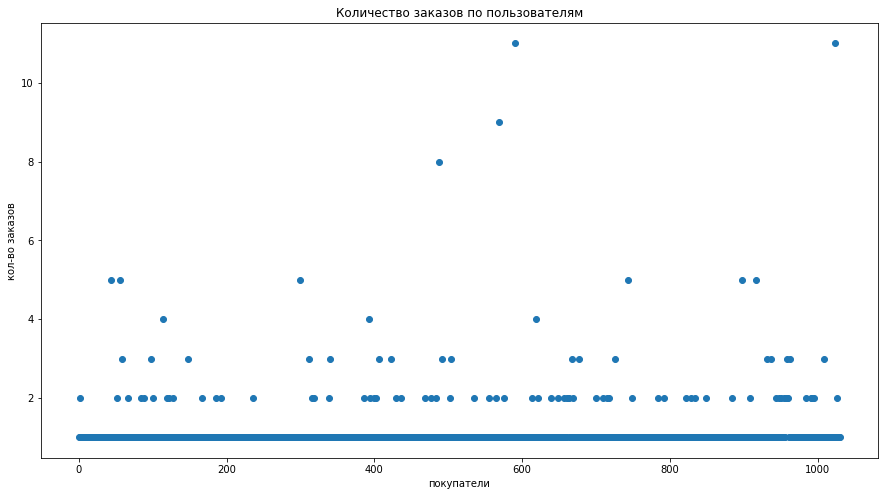

In [20]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False)\
.agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['buyer_id','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.gcf().set_size_inches(15, 8)
plt.title('Количество заказов по пользователям')
plt.xlabel("покупатели")
plt.ylabel("кол-во заказов");

Построим точечную диаграмму количества заказов на одного покупателя. 
Как видно из получившегося графика большнство покупателей сделало 1 заказ. Заметную долю также составляют покупателями с количеством заказов от 2 до 3.
Доля покупателей с количеством заказов больше 3-х очень мала.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Рассчитаем 95% и 99% персентили.
Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей делали заказы более 4 раз. 
Рекомендуемая граница определения аномальных пользователей - 3 заказа на 1 пользователя. 

### График стоимостей заказов

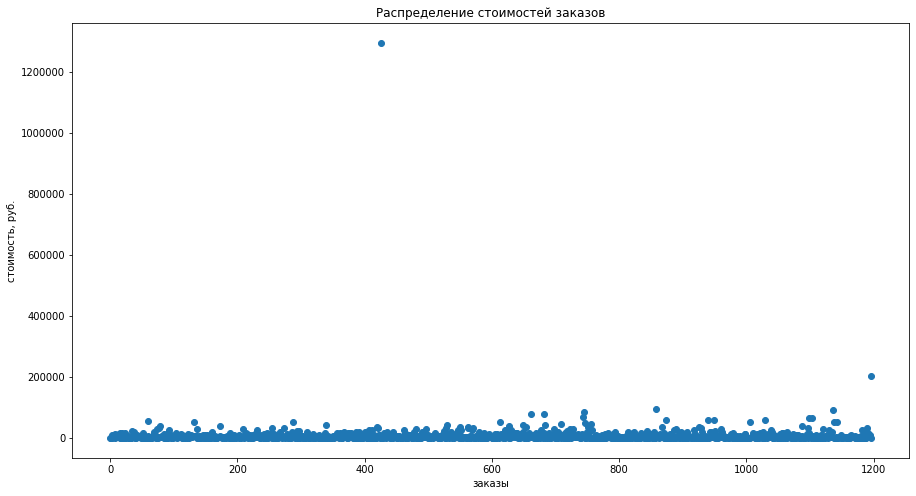

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.gcf().set_size_inches(15, 8)
plt.title('Распределение стоимостей заказов')
plt.xlabel("заказы")
plt.ylabel("стоимость, руб.");

Построим точечный график стоимостей заказов.
Как видно из графика, сумма большинства заказов не превышала 100 000 руб.
Очень дорогих заказов очень мало: их всего 2, при чем один из них супердорогой.

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Рассчитаем 95% и 99% персентили.
Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.
Рекомендуемая граница определения аномальной стоимости заказов - 40 000 руб.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

In [24]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
.agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
.agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [25]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['buyer_id', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['buyer_id', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.008


Рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Критерий Манна-Уитни составил 0,008, т.е. при уровне значимости 0,05 (да и при 0,01) нулевая гипотеза о равенстве конверсий групп А и В отвергается. 
Таким образом, по "сырым" данным конверсия группы А отличается от коверсии группы В. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [26]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
orders[orders['group']=='B']['revenue'])[1]))

0.365


Расчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Критерий Манна-Уитни значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Тем не менее, как мы видели из ранее сделанных графиков средний чек группы B значительно выше среднего чека группы A.

### Выделение аномальных пользователей. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

In [28]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['buyer_id'], \
ordersByUsersB[ordersByUsersB['orders'] > 3]['buyer_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers)

1099     148427295
18       199603092
23       237748145
684      358944393
648      382846391
1137     759473111
339      834731816
949      887908475
744      888512513
709      950626008
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
287     2254456485
131     2254586615
1006    2261934787
755     2279926127
269     2378935119
278     2458001652
1142    2606908679
530     2912540959
424     3062433592
78      3288820196
746     3321013705
501     3717692402
514     3803269165
613     3931967268
940     4003628586
743     4133034833
499     4256040402
662     4266935830
dtype: object


In [29]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['buyer_id'].isin(abnormalUsers))]['orders']\
,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['buyer_id'].isin(abnormalUsers))]['orders'],\
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.0047


Для решения задачи определим аномальных пользователей, количество заказов которых превышало 3, а средний чек превышал 40 тыс. руб. Таких оказалось 34. Исключаем их из групп. Рассчитываем критерий Манна-Уитни.
Он составил 0,0043, т.е. при уровне значимости 0,05 (и при 0,01) нулевая гипотеза о равенстве конверсий групп А и В отвергается. 
Таким образом, по очищенным данным конверсия группы А отличается от коверсии группы В. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [30]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

0.355


Расчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.
Критерий Манна-Уитни значительно больше 0.05 и несущественно изменился по сравнению со своим аналогом для "сырых" данных. 
Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Вывод по результатам теста 

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A и зафиксировались около среднего значения.
График различия среднего чека подвержен сильным колебаниям в связи с наличием сверхдорогих покупок. Сделать из этого графика определённые выводы нельзя.
На основе вышеизложенного представляется целесообразным продолжить тест.

## Выводы

Исходя из фреймворка RICE наиболее приоритетными гипотезами являются гипотезы 7, 2 и 0. Фреймворк RICE для приоритизации выбран, т.к. он учитывает больше факторов по сравнению с фреймворком ICE.

По результатам проведения А/В теста представляется целесообразным продолжить тест, т.к. проведенные исследования дали разнонаправленные результаты и не привели к четко определенным выводам о том, какая из групп лучше. 